# Modeling

In [1]:
# importing libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")

# adding scripts to path
sys.path.append(os.path.abspath("../scripts/python"))

In [2]:
# loading scripts
from connection_manager import Manager
from modeling_utils import Modeling_Utils
man = Manager()
util = Modeling_Utils()

In [3]:
# establishing connection

connection, cursor = man.connect_to_server(host="localhost", port=5432, user="warehouse", password="warehouse", dbName="warehouse")

successfully connected; cursor: <cursor object at 0x7f9b06367e50; closed: 0>


In [4]:
# fetching data
data = man.fetch_data(conn=connection, limit=10000)
data.head(5)

,campaign_id,types,width,height,creative_id,auction_id,browser_ts,game_key,geo_country,site_name,...,volume_agreed,gross_cost_or_budget,agency_fee,percentages,net_cost,design_feature,feature_type,feature_variety,sub_feature,feature_value
0,vf03dnt,impression,250,250,c83nsmhg,7d02f6adc17e402598a9a4eb3d137d9c,2021-02-24 04:13:48,adunit-iwc-portugieser-physics-mpu/3e161c4a758...,United States,www.foodandwine.com,...,315111.11,141800.00,Percentage,0.0,141800,None,None,None,None,None
1,cosp3zs,impression,250,250,j6kwrjow,b32c9e9bbab441a79d8318ab6408c56a,2021-02-05 19:10:09,bd4c7edb8087b54438372b71d3beaee4/84ff985493936...,Singapore,www.timeout.com,...,55222.00,27058.78,Percentage,15.0,22999.96,None,None,None,None,None
2,cosp3zs,impression,250,250,j6kwrjow,b32c9e9bbab441a79d8318ab6408c56a,2021-02-05 19:10:09,bd4c7edb8087b54438372b71d3beaee4/84ff985493936...,Singapore,www.timeout.com,...,55222.00,27058.78,Percentage,15.0,22999.96,None,None,None,None,None
3,vf03dnt,impression,0,0,8ow6q6ij,a869a88149d34f1695926453254677f4,2021-01-01 01:11:58,adunit-iwc-portugieser-physics-mob/d071433c0e0...,United States,www.popsci.com,...,315111.11,141800.00,Percentage,0.0,141800,None,None,None,None,None
4,vf03dnt,impression,0,0,8ow6q6ij,2521126d9005407aaa2ddc309432e4dd,2021-01-01 02:09:38,adunit-iwc-portugieser-physics-mob/d071433c0e0...,United States,www.popsci.com,...,315111.11,141800.00,Percentage,0.0,141800,None,None,None,None,None


In [5]:
# checking data
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")
util.summ_columns(data)

 There are 10000 rows and 36 columns


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,campaign_id,0,0.0,object,52
1,types,0,0.0,object,3
2,width,0,0.0,object,3
3,height,0,0.0,object,3
4,creative_id,0,0.0,object,174
5,auction_id,0,0.0,object,9098
6,browser_ts,0,0.0,datetime64[ns],7369
7,game_key,0,0.0,object,101
8,geo_country,0,0.0,object,10
9,site_name,0,0.0,object,1548


## Automated Data Cleaning

In [6]:
# apply variable remover
data2 = util.reduce_dim_missing(data, 30)

successfully removed


In [7]:
# applying the mode based missing filler
data3 = util.fill_missing_by_mode(data2)

successfully filled


In [8]:
# apply mean based missing value filler
data4 = util.fill_missing_by_mean(data3)

successfully filled


In [9]:
data4.head()

,campaign_id,types,width,height,creative_id,auction_id,browser_ts,game_key,geo_country,site_name,...,serving_location,black_white_audience,cost_centre,currency,buy_rate_cpe,volume_agreed,gross_cost_or_budget,agency_fee,percentages,net_cost
0,vf03dnt,impression,250,250,c83nsmhg,7d02f6adc17e402598a9a4eb3d137d9c,2021-02-24 04:13:48,adunit-iwc-portugieser-physics-mpu/3e161c4a758...,United States,www.foodandwine.com,...,US,No black/white/audience list for this campaign,USA,USD,0.45,315111.11,141800.00,Percentage,0.0,141800
1,cosp3zs,impression,250,250,j6kwrjow,b32c9e9bbab441a79d8318ab6408c56a,2021-02-05 19:10:09,bd4c7edb8087b54438372b71d3beaee4/84ff985493936...,Singapore,www.timeout.com,...,Singapore,No black/white/audience list for this campaign,SGP,SGD,0.49,55222.00,27058.78,Percentage,15.0,22999.96
2,cosp3zs,impression,250,250,j6kwrjow,b32c9e9bbab441a79d8318ab6408c56a,2021-02-05 19:10:09,bd4c7edb8087b54438372b71d3beaee4/84ff985493936...,Singapore,www.timeout.com,...,Singapore,No black/white/audience list for this campaign,SGP,SGD,0.49,55222.00,27058.78,Percentage,15.0,22999.96
3,vf03dnt,impression,0,0,8ow6q6ij,a869a88149d34f1695926453254677f4,2021-01-01 01:11:58,adunit-iwc-portugieser-physics-mob/d071433c0e0...,United States,www.popsci.com,...,US,No black/white/audience list for this campaign,USA,USD,0.45,315111.11,141800.00,Percentage,0.0,141800
4,vf03dnt,impression,0,0,8ow6q6ij,2521126d9005407aaa2ddc309432e4dd,2021-01-01 02:09:38,adunit-iwc-portugieser-physics-mob/d071433c0e0...,United States,www.popsci.com,...,US,No black/white/audience list for this campaign,USA,USD,0.45,315111.11,141800.00,Percentage,0.0,141800


## Automated Filtering

In [10]:
# apply correlation based variable remover
data5 = util.remove_correlated(data4, 0.6)

successfully labeled
number of correlated variables: 12
..................................................
correlated features:  {'currency', 'percentages', 'height', 'placement', 'startdate', 'net_cost', 'campaign_name', 'cost_centre', 'gross_cost_or_budget', 'enddate', 'serving_location', 'kpis'}


In [11]:
# remove the blacklist variables (ids, dates, etc...)
blacklist = ["game_key", "browser_ts", "creative_id", 
            "auction_id", "campaign_id", "campaign_name", 
            "descriptions", "kpis", "black_white_audience", "submission_date"]

# apply blacklist remover
data6 = util.remove_cols(df=data5, cols=blacklist)

successfully removed


In [12]:
# check progress
data6.head()

,types,width,geo_country,site_name,platform_os,device_type,browser,campaign_objectives,buy_rate_cpe,volume_agreed,agency_fee
0,impression,250,United States,www.foodandwine.com,6,Mobile,Chrome,Brand Awareness\nProduct Awareness\nConsiderat...,0.45,315111.11,Percentage
1,impression,250,Singapore,www.timeout.com,6,Mobile,Mobile Safari,Brand Awareness\nProduct Awareness\nMessage Re...,0.49,55222.00,Percentage
2,impression,250,Singapore,www.timeout.com,6,Mobile,Mobile Safari,Brand Awareness\nProduct Awareness\nMessage Re...,0.49,55222.00,Percentage
3,impression,0,United States,www.popsci.com,6,Mobile,Chrome Mobile,Brand Awareness\nProduct Awareness\nConsiderat...,0.45,315111.11,Percentage
4,impression,0,United States,www.popsci.com,6,Mobile,Facebook,Brand Awareness\nProduct Awareness\nConsiderat...,0.45,315111.11,Percentage


## Automated Prepration

In [13]:
# identify feature and target variables
# perform nlp and one hot incoding to prepare the features.
target = data6["types"]
features = util.remove_cols(data6, ["types"])

successfully removed


In [14]:
# apply text cleaner
features2 = util.process_features(features)

successfully cleaned
successfully cleaned
successfully cleaned
successfully cleaned
successfully cleaned
successfully cleaned
successfully cleaned
successfully cleaned
successfully processed


In [15]:
# apply NLP

features3, enco = util.labeler(features2)
features3.head()

successfully labeled


,width,geo_country,site_name,platform_os,device_type,browser,campaign_objectives,buy_rate_cpe,volume_agreed,agency_fee
0,1,8,987,5,0,3,5,0.45,315111.11,1
1,1,4,1430,5,0,11,9,0.49,55222.00,1
2,1,4,1430,5,0,11,9,0.49,55222.00,1
3,0,8,1252,5,0,4,5,0.45,315111.11,1
4,0,8,1252,5,0,8,5,0.45,315111.11,1


## Training and Testing

In [16]:
# train and test model
max_depth = 10
max_features = 0.75
n_estimators = 200

mod, par, metr = util.train(features3, target, max_depth, max_features, n_estimators)


                     precision    recall  f1-score   support

click-through-event       0.00      0.00      0.00        13
      first_dropped       1.00      0.01      0.02        88
         impression       0.95      1.00      0.97      1899

           accuracy                           0.95      2000
          macro avg       0.65      0.34      0.33      2000
       weighted avg       0.95      0.95      0.93      2000

successfully trained and tested


successfully returned


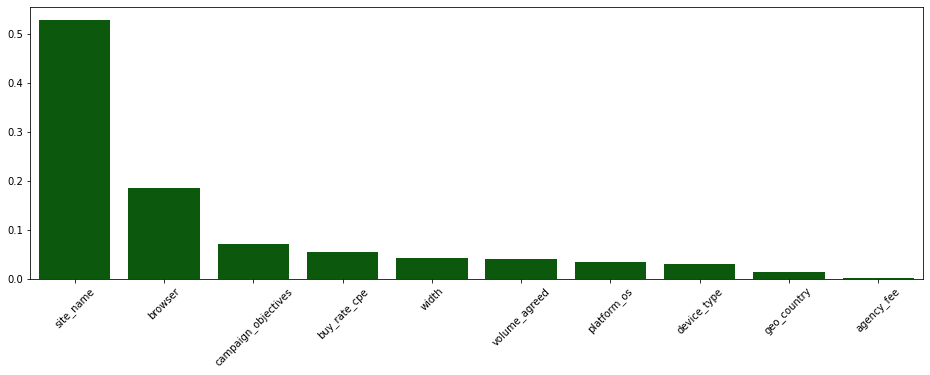

In [17]:
# Check feature importance 
imp_image, importance = util.get_importance(mod, features3)

In [18]:
# saving model, parameters, metrics, and encoder.
util.ml_track(enco, mod, par, metr)

2022/08/10 12:56:31 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2022/08/10 12:56:34 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

successfully saved


In [19]:
# load saved objects.
model, encoder = util.load_model()

successfully loaded
